In [2]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
from matplotlib import animation
import time
import pandas as pd
import multiprocessing
import itertools
from scipy.spatial import distance
import networkx as nx
np.set_printoptions(threshold=np.nan)
import os


# Parameters

In [3]:
N = 1000
vel = 0.1
Prob = 0.1
mu = 0.05
r = 1
D = np.sqrt(1000)

# Predict $R_0$, find threshold from $R_{\infty}$

    Run ABM model over a range of $\lambda = \frac{\beta}{\mu}$ to find critical value 

In [ ]:
for lam in np.arange(0.0, 0.1, 0.001):
    critical = 0
    step2 = 0
    for i in range(100):
        A = np.zeros(shape=(N,3))
        initial1 = random.randint(0,N-1)

        I = np.zeros(N, dtype=np.int64)

        I[initial1] = 1


        A[:,0] = np.arange(0,N)
        A[:,1]= np.random.uniform(0,D, size = N)
        A[:,2] = np.random.uniform(0,D, size =N)

        recovind = [i for i in range(np.size(I)) if I[i]==2]
        infectind = [i for i in range(np.size(I)) if I[i]==1]

        Inf=[len(infectind)]

        ξ = np.random.uniform(-np.pi, np.pi, size = N)
        V = (vel*np.cos(ξ), vel*np.sin(ξ))
        p = np.random.uniform(0,1, size = N)
        N_ir = np.zeros(len(A[:,0]))
        infect = [A[a,0] for a in np.where(I==1)[0]]
        for ind1 in A[:,0]:
            ind1 = int(ind1)
            for ind2 in infect:
                ind2 = int(ind2)
                if ((A[ind1, 1] - A[ind2, 1])**2+ (A[ind1, 2]-A[ind2, 2])**2 < r**2 and (I[ind1]==0)):
                    N_ir[ind1] +=1
            p_beta = np.random.uniform(0,1)
            inf = 1-((1-lam)**N_ir[ind1])
            if ((p_beta<inf) and (I[ind1]==0)):
                I[ind1]= 1


        for agent in A[:,0]:
            agent = int(agent)
            if p[agent] <Prob:
                A[agent, 1] = np.random.uniform(0,D)
                A[agent, 2] = np.random.uniform(0,D)
            else:
                A[agent, 1] = (A[agent, 1]+V[0][agent])%D
                A[agent, 2] = (A[agent, 2]+V[1][agent])%D


        N_ir = np.zeros(len(A[:,0])) #number of agents in nbhd updates for each time step
        infect = [A[a,0] for a in np.where(I==1)[0]]
        for ind1 in A[:,0]:
            ind1 = int(ind1)
            for ind2 in infect:
                ind2 = int(ind2)
                if ((A[ind1, 1] - A[ind2, 1])**2+ (A[ind1, 2]-A[ind2, 2])**2 < r**2 and (I[ind1]==0)):
                    N_ir[ind1] +=1
            p_beta = np.random.uniform(0,1)
            inf = 1-((1-lam)**N_ir[ind1])
            if ((p_beta<inf) and (I[ind1]==0)):
                I[ind1]= 1
    
        for node in np.where(I==1)[0]:
            recover = np.random.uniform(0,1)
            if recover<mu:
                I[node] = 2

        infectind = [i for i in range(np.size(I)) if I[i]==1]
        
        critical += len(infectind)
    lam_crit_1.append(critical/100 )

<IPython.core.display.Javascript object>


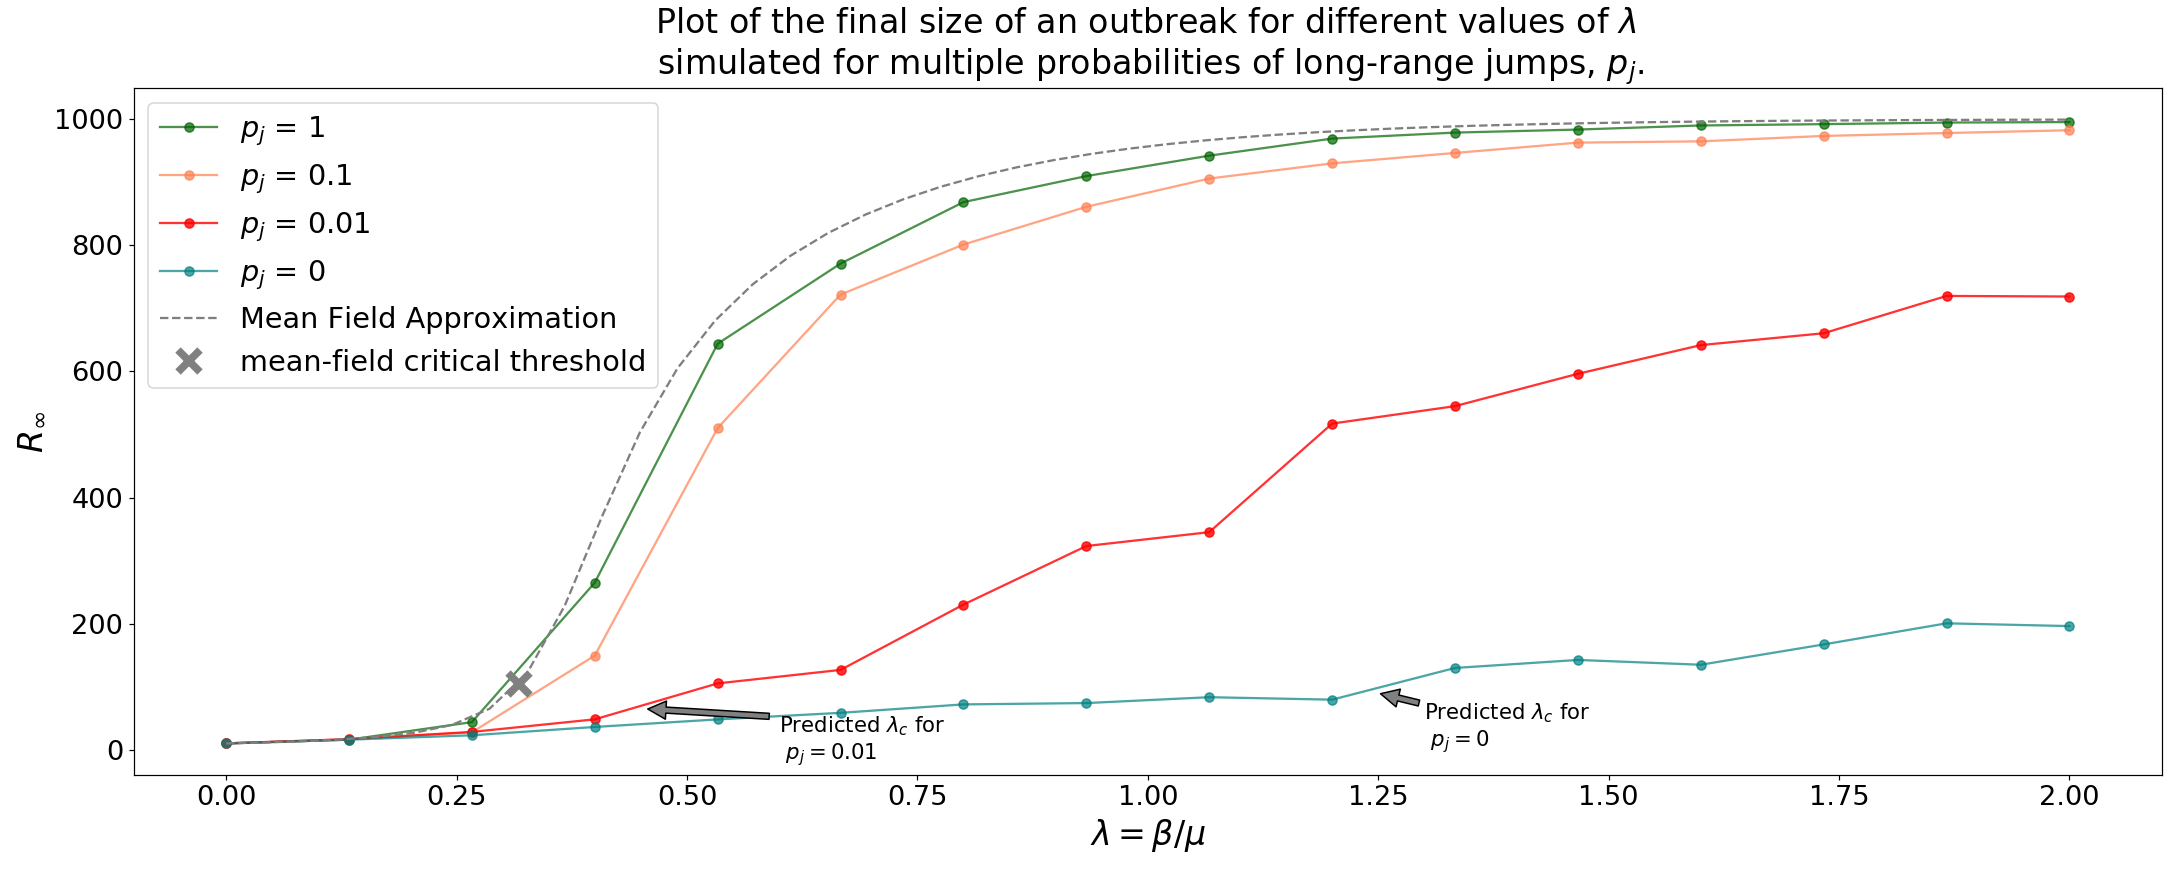

In [144]:
%matplotlib notebook
fig = plt.figure(figsize= (20,8))
ax = fig.add_subplot(111)
p1 = plt.plot(np.linspace(0,0.1, 16)/0.05, final_size_prob1, 'o-', c = 'darkgreen',alpha = 0.7, label = '$p_j$ = 1')
p2 = plt.plot(np.linspace(0,0.1, 16)/0.05, final_size_prob01, 'o-', c = 'coral',alpha = 0.7, label = '$p_j$ = 0.1')
plt.plot(np.linspace(0.,0.1, 16)/0.05, final_size_prob001, 'o-', c = 'red',alpha = 0.8, label = '$p_j$ = 0.01')
plt.plot(np.linspace(0.,0.1, 16)/0.05, final_size_prob0, 'o-', c = 'teal',alpha = 0.7,label = '$p_j$ = 0')
plt.plot(np.linspace(0,0.1, 50)/0.05, [i*1000 for i in mean_field_final_size],'--', c = 'tab:grey', label = 'Mean Field Approximation ' )

plt.plot(1/np.pi, 105, 'x', label ='mean-field critical threshold', ms=15,mew =5, c='grey')
ax.annotate('Predicted $λ_c$ for \n $p_j = 0.01$', xy=(0.45, final_size_prob001[4]-40), xytext=(0.6, -20),
            arrowprops=dict(facecolor='grey', shrink=0.05), fontsize = 14
            )
ax.annotate('Predicted $λ_c$ for \n $p_j = 0$', xy=(1.25, final_size_prob0[10]-40), xytext=(1.3, 0),
            arrowprops=dict(facecolor='grey', shrink=0.05), fontsize = 14
            )
plt.legend(loc = 'upper left', fontsize = 19)
plt.xlabel('$λ = β/μ$', fontsize =22)
plt.ylabel('$R_{\infty}$', fontsize = 22)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title('Plot of the final size of an outbreak for different values of $λ$ \n simulated for multiple probabilities of long-range jumps, $p_j$. ', fontsize = 22)
plt.tight_layout()
